In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26

plt.rc('font', size=BIGGER_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams['figure.dpi'] = 75
plt.rcParams['text.usetex'] = True

In [4]:
from simulation.object.circle import Circle
from simulation.object.line import Line

def generate_lens(length, LPmm, h_to_l, from_center=False):
    end_chord = 1 / LPmm
    h = h_to_l * end_chord
    w = 0.5

    r = (4 * h**2 + end_chord**2) / (8 * h)
    objects = []
    j, k = 0, 1
    for i in np.arange(0, length * LPmm + 1, 1):
        if not from_center:
            circ = Circle(-length/2 + i * end_chord, 0, r, end_chord)
        else:
            if i % 2 == 0:
                circ = Circle(0 + j * end_chord, 0, r, end_chord)
                j += 1
            else:
                circ = Circle(0 - k * end_chord, 0, r, end_chord)
                k += 1

        objects.append(circ)

    objects.sort(key=lambda x: x.x0)

    objects.append(Line(-length/2, length/2, -w - (r - h), -w - (r - h)))

    return objects

In [11]:
def generate_lens_reversed(length, LPmm, h_to_l, from_center=False):
    end_chord = 1 / LPmm
    h = h_to_l * end_chord
    w = 0.5

    r = (4 * h**2 + end_chord**2) / (8 * h)
    objects = []
    j, k = 0, 1
    for i in np.arange(0, length * LPmm + 1, 1):
        if not from_center:
            circ = Circle(-length/2 + i * end_chord, 0, r, end_chord, 'D')
        else:
            if i % 2 == 0:
                circ = Circle(0 + j * end_chord, 0, r, end_chord, 'D')
                j += 1
            else:
                circ = Circle(0 - k * end_chord, 0, r, end_chord, 'D')
                k += 1

        objects.append(circ)

    objects.sort(key=lambda x: x.x0)

    objects.append(Line(-length/2, length/2, w + (r - h), w + (r - h)))

    return objects

In [20]:
import math

def calc_beam_angle(rays):
    angles = []

    for ray in rays:
        if ray.direction == 'L':
            continue
        angle = math.atan(ray.slope)

        angles.append(math.pi / 2 - angle if angle > 0 else 3 / 2 * math.pi - (math.pi - angle))

    angles = np.array(angles)
    return np.max(angles) * 2 * 180 / math.pi

In [101]:
lens = generate_lens(100, 15.8 * 10**-1, 0.17 / 0.37)

In [90]:
lens = generate_lens_reversed(100, 15.8 * 10**-1, 0.17 / 0.37)

In [108]:
from simulation.ray_tracer import trace_ray
from simulation.ray import Ray

rays_x = np.linspace(-2, 2, 549)

rays = [Ray(x, -10) for x in rays_x]

for i, ray in enumerate(rays):
    try:
        ray = trace_ray(ray, lens, 1.489, 20)
    except ValueError as e:
        print(e, i)

In [109]:
calc_beam_angle(rays)

86.76950786928677

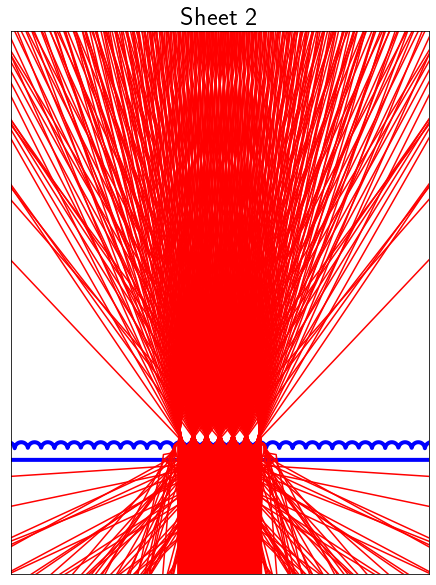

In [111]:
fig, ax = plt.subplots()

x_vals = np.arange(-50/2, 50/2, 0.01)
y_coords = []

lens_idx = 1

obj_idx = 0

for x in x_vals:
    y_coord = lens[obj_idx].y_coords(x)
    if y_coord is None:
        obj_idx += 1
        y_coords.append(lens[obj_idx].y_coords(x))
    else:
        y_coords.append(y_coord)

ax.plot(x_vals, y_coords, color='blue', linewidth=4)
ax.plot(x_vals, lens[-1].y_coords(x_vals), color='blue', linewidth=4)

for i, ray in enumerate(rays[1:-1]):
    ray_points = np.array(ray.points).swapaxes(0, 1)
    ax.plot(ray_points[0], ray_points[1], color='red')

plt.ylim(-6, 20)
plt.xlim(-10, 10)
# plt.xlabel('mm')
# plt.ylabel('mm')
ax.set_yticks([])
ax.set_xticks([])
ax.set_aspect(1)
ax.set_title('Sheet 2')
fig.set_size_inches(10, 10)
plt.show()

In [97]:
calc_beam_angle(rays)

82.87526681700174

In [26]:
h_to_l = 0.3
w_beam = 10

LPcms = np.linspace(0.01, 10, 150)

lenses = []

for LPcm in LPcms:
    lenses.append(generate_lens(10, LPcm * 10 ** -1, h_to_l, from_center=True))

In [416]:
len(lenses[0])

3

In [434]:
from simulation.ray_tracer import trace_ray
from simulation.ray import Ray

angles = []

for i, lens in enumerate(lenses):
    print(i)
    rays_x = np.linspace(-w_beam / 2, w_beam / 2, 5000)

    rays = [Ray(x, -10) for x in rays_x]
    for i, ray in enumerate(rays):
        try:
            ray = trace_ray(ray, lens, 1.489, 500)
        except ValueError as e:
            print(e, i)

    angle = calc_beam_angle(rays)
    angles.append(angle)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [27]:
import pickle

angles_03 = []

angles_03.append(pickle.load(open('LPcm_beam_angle_0.3h_l_1mm_wb.pickle', 'rb')))
angles_03.append(pickle.load(open('LPcm_beam_angle_0.3h_l_2mm_wb.pickle', 'rb')))
angles_03.append(pickle.load(open('LPcm_beam_angle_0.3h_l_4mm_wb.pickle', 'rb')))
angles_03.append(pickle.load(open('LPcm_beam_angle_0.3h_l_10mm_wb.pickle', 'rb')))

In [19]:
import pickle

angles_02 = []

angles_02.append(pickle.load(open('LPcm_beam_angle_0.2h_l_1mm_wb.pickle', 'rb')))
angles_02.append(pickle.load(open('LPcm_beam_angle_0.2h_l_2mm_wb.pickle', 'rb')))
angles_02.append(pickle.load(open('LPcm_beam_angle_0.2h_l_4mm_wb.pickle', 'rb')))
angles_02.append(pickle.load(open('LPcm_beam_angle_0.2h_l_10mm_wb.pickle', 'rb')))

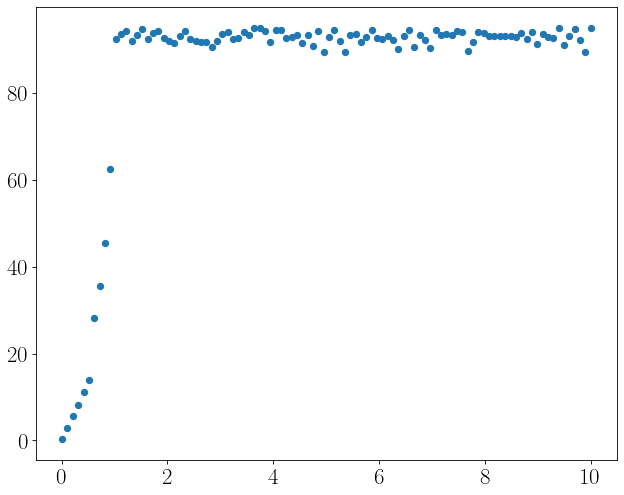

In [435]:
fig, ax = plt.subplots()

ax.plot(LPcms, angles, marker='o', linestyle='None', label='1mm')

In [12]:
len(angles_03[2])

150

In [24]:
h_to_l

0.2

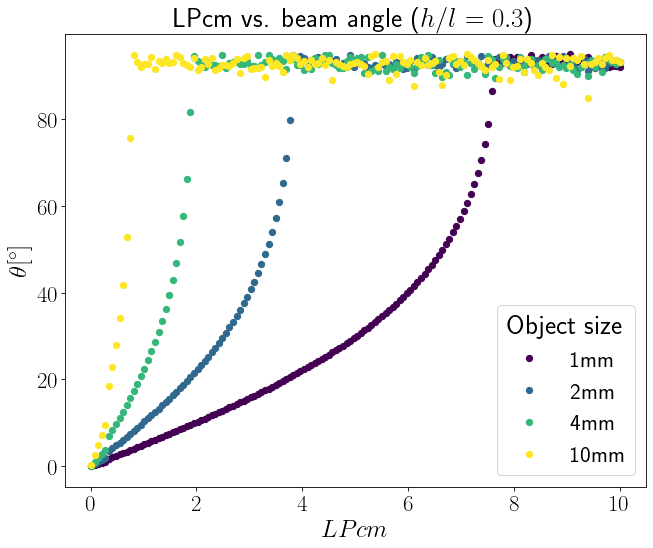

In [28]:
fig, ax = plt.subplots()

colors = plt.cm.viridis(np.linspace(0, 1, 4))

ax.plot(LPcms, angles_03[0], marker='o', linestyle='None', label='1mm', color=colors[0])
ax.plot(LPcms, angles_03[1], marker='o', linestyle='None', label='2mm', color=colors[1])
ax.plot(LPcms, angles_03[2], marker='o', linestyle='None', label='4mm', color=colors[2])
ax.plot(LPcms, angles_03[3], marker='o', linestyle='None', label='10mm', color=colors[3])


ax.set_ylabel(r'$\theta[^\circ]$')
ax.set_xlabel(r'$LPcm$')

ax.legend(title='Object size')

ax.set_title('LPcm vs. beam angle ($h/l={}$)'.format(h_to_l))
plt.savefig('LPcm_beam_angle_{}mm.png'.format(h_to_l))

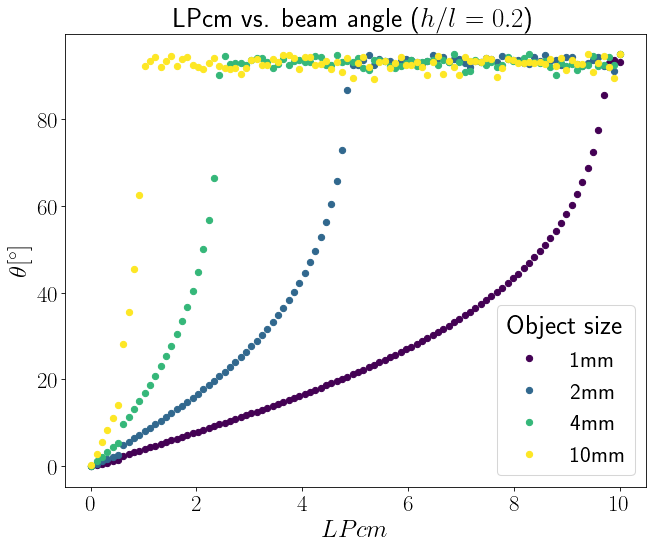

In [23]:
fig, ax = plt.subplots()

colors = plt.cm.viridis(np.linspace(0, 1, 4))

ax.plot(LPcms, angles_02[0], marker='o', linestyle='None', label='1mm', color=colors[0])
ax.plot(LPcms, angles_02[1], marker='o', linestyle='None', label='2mm', color=colors[1])
ax.plot(LPcms, angles_02[2], marker='o', linestyle='None', label='4mm', color=colors[2])
ax.plot(LPcms, angles_02[3], marker='o', linestyle='None', label='10mm', color=colors[3])


ax.set_ylabel(r'$\theta[^\circ]$')
ax.set_xlabel(r'$LPcm$')

ax.legend(title='Object size')

ax.set_title('LPcm vs. beam angle ($h/l={}$)'.format(h_to_l))
plt.savefig('LPcm_beam_angle_{}mm.png'.format(h_to_l))

In [436]:
import pickle

with open('LPcm_beam_angle_{}h_l_{}mm_wb.pickle'.format(h_to_l, w_beam), 'wb') as f:
        pickle.dump(angles, f)

In [486]:
h_to_ls = np.linspace(0.01, 0.7, 100)

LPcms = [0.25, 0.5, 0.75, 1, 5, 10, 15, 20]

lenses = {}

for LPcm in LPcms:
    lenses[LPcm] = []
    for h_to_l in h_to_ls:
        lenses[LPcm].append(generate_lens(10, LPcm * 10 ** -1, h_to_l))

In [489]:
from simulation.ray_tracer import trace_ray
from simulation.ray import Ray

angles = {}

for LPcm in LPcms:
    angles[LPcm] = []

    for i, lens in enumerate(lenses[LPcm]):
        rays_x = np.linspace(-1, 1, 5000)

        print(i)

        rays = [Ray(x, -10) for x in rays_x]
        for i, ray in enumerate(rays):
            try:
                ray = trace_ray(ray, lens, 1.489, 20)
            except ValueError as e:
                print(e, i)

        try:
            angle = calc_beam_angle(rays)
        except ValueError:
            continue

        angles[LPcm].append(angle)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

In [488]:
LPcm

1

In [458]:
calc_beam_angle(rays)

[]


ValueError: zero-size array to reduction operation maximum which has no identity

In [476]:
import pickle

with open('h_l_angle.pickle', 'wb') as f:
        pickle.dump(angles, f)

In [315]:
import pickle

with open('h_l_angle.pickle', 'rb') as f:
        angles = pickle.load(f)

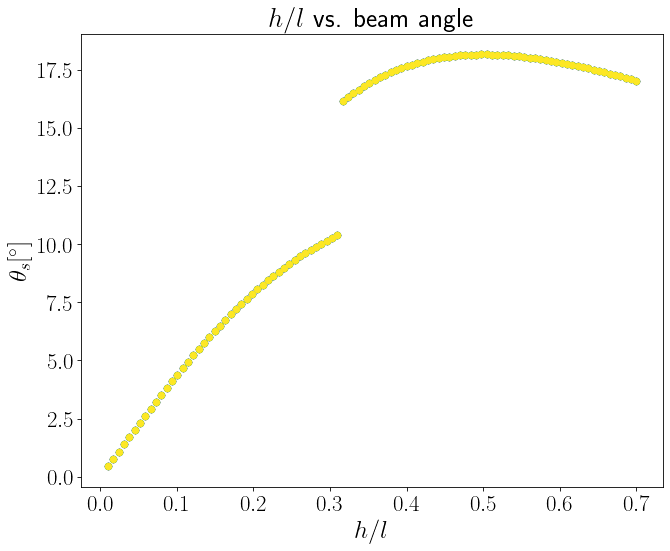

In [477]:
fig, ax = plt.subplots()

colors = plt.cm.viridis(np.linspace(0, 1, len(angles)))

for i, LPcm in enumerate(angles.keys()):
    ax.scatter(h_to_ls, angles[LPcm], color=colors[i])

ax.set_ylabel(r'$\theta_{s}[^\circ]$')
ax.set_xlabel(r'$h/l$')

ax.set_title('$h/l$ vs. beam angle')
plt.savefig('h_l_beam_angle_20LPcm.png')

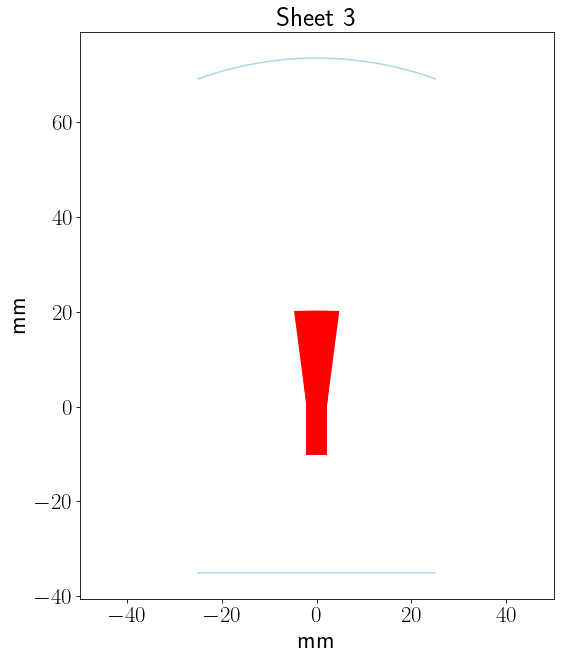

In [54]:
fig, ax = plt.subplots()

x_vals = np.arange(-50/2, 50/2, 0.01)
y_coords = []

lens_idx = 1

obj_idx = 0

for x in x_vals:
    y_coord = lenses[lens_idx][obj_idx].y_coords(x)
    if y_coord is None:
        obj_idx += 1
        y_coords.append(lenses[lens_idx][obj_idx].y_coords(x))
    else:
        y_coords.append(y_coord)

ax.plot(x_vals, y_coords, color='lightblue')
ax.plot(x_vals, lenses[lens_idx][-1].y_coords(x_vals), color='lightblue')

for i, ray in enumerate(rays):
    ray_points = np.array(ray.points).swapaxes(0, 1)
    ax.plot(ray_points[0], ray_points[1], color='red')

# plt.ylim(-6, 20)
plt.xlim(-50, 50)
plt.xlabel('mm')
plt.ylabel('mm')
ax.set_aspect(1)
ax.set_title('Sheet 3')
fig.set_size_inches(10, 10)
plt.show()